# 1 Multi-class Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

## 1.1 Dataset

In [2]:
data = loadmat('../data/ex3data1.mat')
y = data['y']
y %= 10 # fixes “0” digit is labeled as “10”
y = np.squeeze(y) # shape [N,1] -> [N,]
X = data['X'] 
X = np.append(np.ones([X.shape[0],1]),X, axis=1) # add bais

## 1.2 Visualizing the data

6


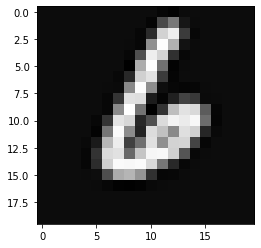

In [3]:
img_num = np.random.randint(len(y))
img = np.reshape(X[img_num, 1:], [20,20]).T
print(y[img_num])
plt.imshow(img, cmap='gray')
plt.show()

## 1.3 Vectorizing Logistic Regression

In [4]:
def sig(x):
    return 1/(1+np.exp(-x))

In [5]:
def costFunction(theta, X, y, l=0):
    h = sig(X.dot(theta))
    cost = (-y*np.log(h)-(1-y)*np.log(1-h)).sum()/len(y)
    reg = (theta[1:]**2).sum()*l/(2*len(y))
    return cost + reg

In [6]:
def computGrad(theta, X, y, l=0):
    h = sig(X.dot(theta))
    costGrad = (h-y).dot(X)/len(y)
    regGrad = (l/len(y))*theta
    regGrad[0] = 0
    return costGrad + regGrad

## 1.4 One-vs-all Classification

In [7]:
def oneVsAll(init_thetaM, X, y, K, l=0):
    thetaM = np.zeros_like(init_thetaM)
    for i in range(K):
        tmp_y = (y==i)*1
        op_result = minimize(costFunction, init_thetaM[i,:] , args=(X,tmp_y,l), jac=computGrad, method='L-BFGS-B')
        print(op_result.success)
        thetaM[i,:] = op_result.x
    return thetaM

In [9]:
K = 10
init_thetaM = np.zeros([K, X.shape[1]])
thetaM = oneVsAll(init_thetaM, X, y, K)

/home/ofir/miniconda3/envs/pandas_exercises/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ofir/miniconda3/envs/pandas_exercises/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


True


/home/ofir/miniconda3/envs/pandas_exercises/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


True
True
True
True
True
True
True
True
True


In [10]:
acc = ((X.dot(thetaM.T).argmax(axis=1)-y)==0).sum()/len(y)
print('The accuracy is: ' + str(acc))

The accuracy is: 0.9906
